<a href="https://colab.research.google.com/github/beiranvand2013-ops/PYTHON_PROJECTS/blob/main/2_Performance_of_regression_models_homework_answer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

download link of dataset:

https://drive.google.com/file/d/17JqmcbKhE-Q7nnCBAuLDBG6qoGazIFv8/view?usp=drive_link

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
df=pd.read_csv('/content/drive/MyDrive/datasets/used_cars.csv')
print(df)

                              name  year  selling_price  km_driven    fuel  \
0           Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1     Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2         Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3        Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4           Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
...                            ...   ...            ...        ...     ...   
8123             Hyundai i20 Magna  2013         320000     110000  Petrol   
8124         Hyundai Verna CRDi SX  2007         135000     119000  Diesel   
8125        Maruti Swift Dzire ZDi  2009         382000     120000  Diesel   
8126               Tata Indigo CR4  2013         290000      25000  Diesel   
8127               Tata Indigo CR4  2013         290000      25000  Diesel   

     seller_type transmission                 owner     mileage

# *************** PreProssing *********************

 ## **   viewing  data ***

In [23]:
df.head()
df.shape
df.columns
df.dtypes
#------------------------   uniques:
df.nunique()
df.year.nunique()
df.name.nunique()
df.fuel.nunique()
df.seller_type.nunique()
df.transmission.nunique()
df.torque.nunique()
df["torque"].head(20)
df.mileage.nunique()
df.engine.nunique()
df.max_power.nunique()
#-----------------------------
df.info()
# ((year	selling_price	km_driven		mileage	engine	max_power		seats ))   are numeral  and others are object !!
df.describe()
df.isnull().sum()
#  mileage	engine max_power  torque  seat  have nulls
#-------------------------
# correlation of numerals:
df.corr(numeric_only=True)
#---------------------------------------  value counts:
df['name'].value_counts()
df['year'].value_counts()
df['selling_price'].value_counts()
df['km_driven'].value_counts()
df['seller_type'].value_counts()
df['transmission'].value_counts()
df['owner'].value_counts()
df['mileage'].value_counts()
df['engine'].value_counts()
df['max_power'].value_counts()
df['torque'].value_counts()
df['seats'].value_counts()
df['fuel'].value_counts().to_frame()
#---------------------------------------------------------------------


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


,count
fuel,
Diesel,4402
Petrol,3631
CNG,57
LPG,38


### Data Cleaning



extracting data from "torque" feature and make 2 new features of it

In [24]:
import re

def extract_data(s):

    results = []

    for p in ["kgm", "Nm","rpm"]:
      if p!="rpm":
       # به دنبال عدد صحیح یا اعشاری که دقیقا قبل از عبارت باشد
          match = re.search(r"(\d+(?:\.\d+)?)" + p, s)
      else:
           match = re.search(r"(\d+)" +p, s)
      if match:
            results.append(float(match.group(1)))
      else:
            # اگر عبارت هست ولی عددی قبلش نیست → None
            if p in s:
                results.append(np.nan)
            else:
                results.append(np.nan)

    return tuple(results)


df["torque"]=df["torque"].astype(str)
df["result"]=df["torque"].apply(extract_data)
df["result"].head(50)
list1=[]
list2=[]
list3=[]
for row in list(df["torque"].index):
  list1.append(df["result"][row][0])
  list2.append(df["result"][row][1])
  list3.append(df["result"][row][2])
df["torque(kgm)"]=pd.DataFrame(list1)
df["torquenm)"]=pd.DataFrame(list2)
df["torque(rpm)"]=pd.DataFrame(list3)
df=df.drop(columns="result",axis=1)
df["torque(kgm)"].head(40)

,torque(kgm)
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


filling nulls

In [25]:



df = df.apply(lambda x: x.fillna(pd.to_numeric(x, errors='coerce').mean())
              if pd.to_numeric(x.dropna(), errors='coerce').isnull().sum() == 0
              else x.fillna(x.mode()[0]))
#  dropna removes all NAN members to avoid converting to numbers and then  the column is checked by if not to be numeric

df.isnull().sum()


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0


removing  unless columns:

In [26]:
df=df.drop(['name',"torque","torque(kgm)"],axis=1)
df.head()



,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torquenm),torque(rpm)
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0,190.000000,2000.000000
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0,250.000000,2500.000000
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0,177.828166,3072.693126
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0,177.828166,2750.000000
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0,177.828166,3072.693126


# Data Visualization

## correlation:

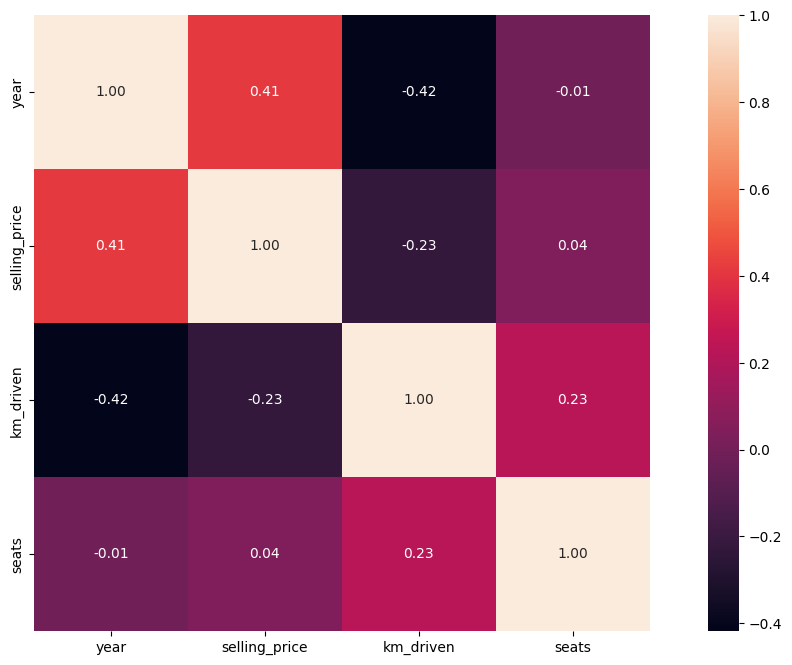

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr,square=True, annot= True, fmt = '.2f')
plt.show()

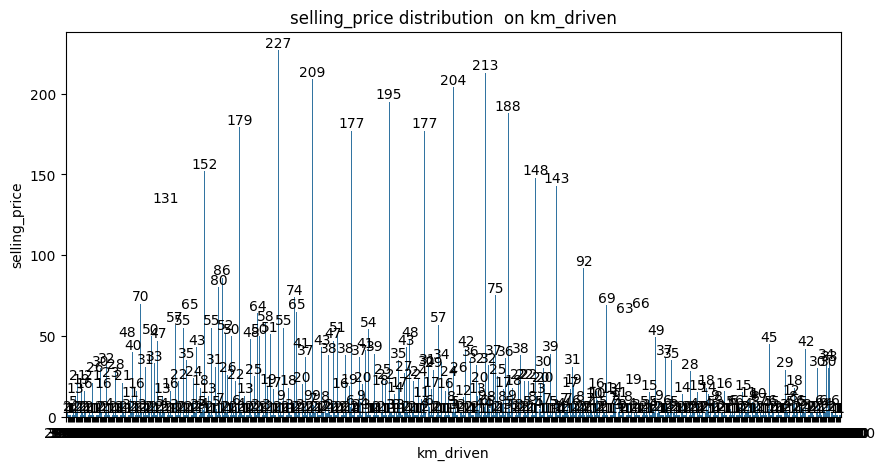

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data = df,x = 'selling_price')
#  it plots a bar plot of two features of a dataframe, such as selling_price and km_driven
ax.bar_label(ax.containers[0], label_type='edge')
plt.title("selling_price distribution  on km_driven")
plt.ylabel("selling_price")
plt.xlabel("km_driven")
plt.show()

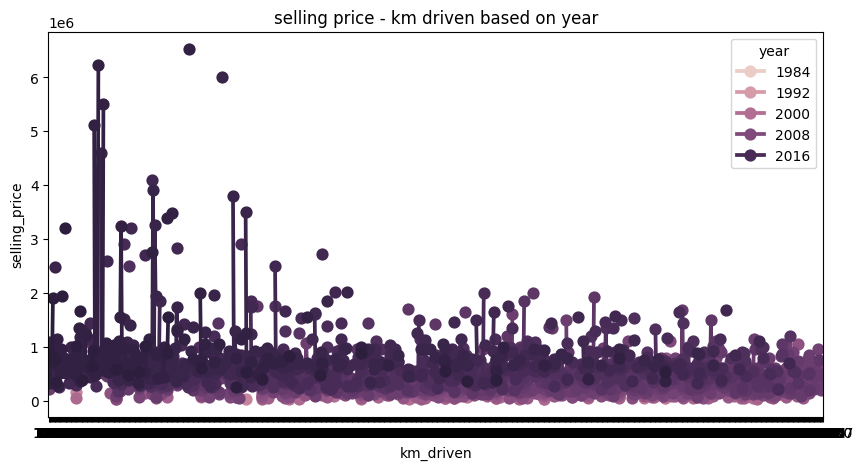

In [ ]:
plt.figure(figsize=(10,5))
sns.pointplot(x ='km_driven', y = 'selling_price', hue = 'year', data = df, errorbar=None);
# 3 variable plot
plt.title("selling price - km driven based on year")
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.show()

<Axes: xlabel='km_driven', ylabel='selling_price'>

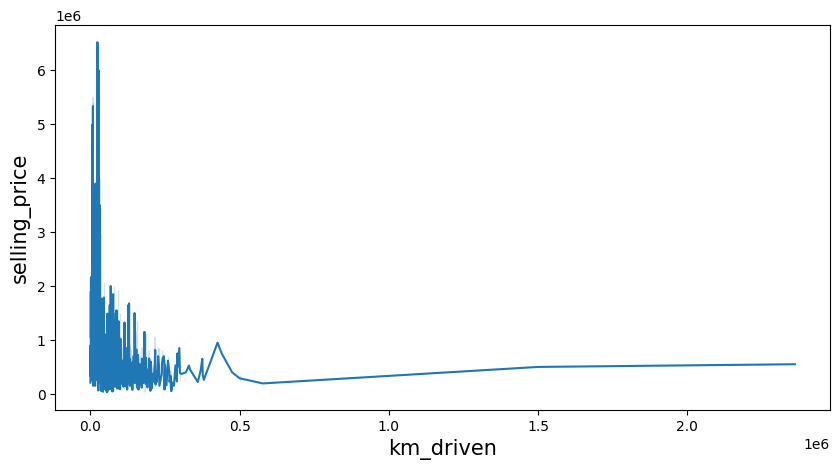

In [ ]:
plt.figure(figsize=(10,5))
plt.xlabel("km_driven", fontsize = 15)
plt.ylabel("selling_price", fontsize = 15)
sns.lineplot(x ="km_driven" , y ="selling_price", data = df)

# Label_Encoding :  

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['fuel','seller_type','transmission','owner','year']:
  df[col]=le.fit_transform(df[col])
print(df.head())


   year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0    22         450000     145500     1            1             1      0   
1    22         370000     120000     1            1             1      2   
2    14         158000     140000     3            1             1      4   
3    18         225000     127000     1            1             1      0   
4    15         130000     120000     3            1             1      0   

      mileage   engine   max_power  seats   torquenm)  torque(rpm)  
0   23.4 kmpl  1248 CC      74 bhp    5.0  190.000000  2000.000000  
1  21.14 kmpl  1498 CC  103.52 bhp    5.0  250.000000  2500.000000  
2   17.7 kmpl  1497 CC      78 bhp    5.0  177.828166  3072.693126  
3   23.0 kmpl  1396 CC      90 bhp    5.0  177.828166  2750.000000  
4   16.1 kmpl  1298 CC    88.2 bhp    5.0  177.828166  3072.693126  


changing no numeric to numeric:

In [28]:


for i in df.index:
  st=str(df["mileage"][i])
  df['mileage'][i]= st.replace(" km/kg","")

removing_suffix={'mileage':" kmpl",'engine':" CC",'max_power':" bhp"}
for col in ['mileage','engine','max_power']:
  for i in df.index:
    st=str(df[col][i])
    df[col][i]=st.replace(removing_suffix[col],"")
  df[col]=pd.to_numeric(df[col])

df.dtypes
df.isnull().sum()
#-----------------------------
np.where(df['max_power'].isnull())[0]


Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[col][i]=st.replace(removing_suffix[col],"")
/tmp/ipython-input-3079864554.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][i]=st.replace(removing_suffix[col],"")
/tmp/ipython-input-3079864554.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typi

array([4933])

filling recent nulls:

In [29]:
df = df.apply(lambda x: x.fillna(pd.to_numeric(x, errors='coerce').mean())
              if pd.to_numeric(x.dropna(), errors='coerce').isnull().sum() == 0
              else x.fillna(x.mode()[0]))
#  dropna removes all NAN members to avoid converting to numbers and then  the column is checked by if not to be numeric

df.isnull().sum()

,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0
max_power,0


Standardization

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df=df1
df.isnull().sum()

,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0
max_power,0


# ***   Processing  ***

##  making features and target :

In [31]:

from sklearn.model_selection import train_test_split

#--------------------------------------------------------------------
X=df.drop("selling_price",axis=1)
y=df["selling_price"]
X.isnull().sum()

,0
year,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,0
engine,0
max_power,0
seats,0


spliting:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Single Variable Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
#------------------------------------------------------------------------------------
# Create regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)
print(f"model intercept : {model.intercept_}")
print(f"model conf : {model.coef_}")


# Predict values for real values
y_pred=model.predict(X_test)

# Calculating the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculating the R-squared score
r2 = r2_score(y_test, y_pred)


# Show result
print(f"Mean Squared Error : {mse}")
print(f"R-squared : {r2}")







In [ ]:
ridge = Ridge(alpha=0.05)
ridge.fit(X_train,y_train)

Ridge(alpha=0.2)

In [ ]:

print(ridge.score(X_test, y_test))

0.6446597405224677


In [ ]:
lasso = Lasso(alpha=0.05)
lasso.fit(X_train,y_train)

Lasso(alpha=0.05)

In [ ]:

print(lasso.score(X_test, y_test))

0.6558087686553893


In [ ]:
elastic = ElasticNet(alpha=0.5,l1_ratio=0.1)
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.5, l1_ratio=0.1)

In [ ]:

print(elastic.score(X_test, y_test))

0.6456860337501531


## finding  the best hyperparameters:

In [33]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
!pip install scikit-optimize scikit-learn
from skopt import BayesSearchCV

##    **************** (( GridSearchCV ))  ****************


### GridSearchCV for ((ridge)) model:

In [37]:
params = {
            'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],

            }
ridge = Ridge()   # WITH OUT PARAMETERS!!
grid_search = GridSearchCV(estimator=ridge,param_grid=params,scoring='r2',cv=5)

grid_search.fit(X_train, y_train)

print("Grid Search : \n===============================")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_}")

Grid Search : 
Best Parameters: {'alpha': 1}
Best R2 Score: 0.6826774222051115


### GridSearchCV for ((Lasso)) moldel:

In [38]:
params = {
            'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],

            }
lasso = Lasso()   # WITH OUT PARAMETERS!!
grid_search = GridSearchCV(estimator=ridge,param_grid=params,scoring='r2',cv=5)

grid_search.fit(X_train, y_train)

print("Grid Search : \n===============================")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_}")

Grid Search : 
Best Parameters: {'alpha': 1}
Best R2 Score: 0.6826774222051115


### GridSearchCV for ((ElasticNet)) moldel:

In [42]:
params = {
            'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],

            }
elasticNet = ElasticNet()   # WITH OUT PARAMETERS!!
grid_search = GridSearchCV(estimator=elasticNet,param_grid=params,scoring='r2',cv=5)

grid_search.fit(X_train, y_train)

print("Grid Search : \n===============================")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R2 Score: {grid_search.best_score_}")

Grid Search : 
Best Parameters: {'alpha': 0.001}
Best R2 Score: 0.6826781588864087


In [ ]:
##############################################################################################################################################################################################################

## ******** RandomizedSearchCV ***************

RandomizedSearchCV  for  Ridge:

In [44]:
model = Ridge()
params = {'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              }

random_search = RandomizedSearchCV(
                                    estimator=model,
                                    param_distributions=params,
                                    scoring='r2',
                                    cv=5,
                                    n_iter=3,
                                    verbose=3)

random_search.fit(X_train, y_train)

print("RandomizedSearchCV : \n===============================")
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END .........................alpha=0.5;, score=0.719 total time=   0.0s
[CV 2/5] END .........................alpha=0.5;, score=0.636 total time=   0.0s
[CV 3/5] END .........................alpha=0.5;, score=0.708 total time=   0.0s
[CV 4/5] END .........................alpha=0.5;, score=0.667 total time=   0.0s
[CV 5/5] END .........................alpha=0.5;, score=0.683 total time=   0.0s
[CV 1/5] END .........................alpha=0.3;, score=0.719 total time=   0.0s
[CV 2/5] END .........................alpha=0.3;, score=0.636 total time=   0.0s
[CV 3/5] END .........................alpha=0.3;, score=0.708 total time=   0.0s
[CV 4/5] END .........................alpha=0.3;, score=0.667 total time=   0.0s
[CV 5/5] END .........................alpha=0.3;, score=0.683 total time=   0.0s
[CV 1/5] END .........................alpha=0.9;, score=0.719 total time=   0.0s
[CV 2/5] END .........................alpha=0.9;,

RandomizedSearchCV  for  Lasso:

In [43]:
model = Lasso()
params = {'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              }

random_search = RandomizedSearchCV(
                                    estimator=model,
                                    param_distributions=params,
                                    scoring='r2',
                                    cv=5,
                                    n_iter=3,
                                    verbose=3)

random_search.fit(X_train, y_train)

print("RandomizedSearchCV : \n===============================")
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ........................alpha=0.8;, score=-0.001 total time=   0.0s
[CV 2/5] END .........................alpha=0.8;, score=0.016 total time=   0.0s
[CV 3/5] END ........................alpha=0.8;, score=-0.001 total time=   0.0s
[CV 4/5] END ........................alpha=0.8;, score=-0.000 total time=   0.0s
[CV 5/5] END .........................alpha=0.8;, score=0.005 total time=   0.0s
[CV 1/5] END .........................alpha=0.5;, score=0.322 total time=   0.0s
[CV 2/5] END .........................alpha=0.5;, score=0.340 total time=   0.0s
[CV 3/5] END .........................alpha=0.5;, score=0.311 total time=   0.0s
[CV 4/5] END .........................alpha=0.5;, score=0.345 total time=   0.0s
[CV 5/5] END .........................alpha=0.5;, score=0.360 total time=   0.0s
[CV 1/5] END .........................alpha=0.6;, score=0.216 total time=   0.0s
[CV 2/5] END .........................alpha=0.6;,

RandomizedSearchCV  for  ElasticNet:

In [45]:
model = ElasticNet()
params = {'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]}

random_search = RandomizedSearchCV(
                                    estimator=model,
                                    param_distributions=params,
                                    scoring='r2',
                                    cv=5,
                                    n_iter=3,
                                    verbose=3)

random_search.fit(X_train, y_train)

print("RandomizedSearchCV : \n===============================")
print("Best Parameters:", random_search.best_params_)
print("Best R2 Score:", random_search.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5] END ...........alpha=0.4, l1_ratio=0.8;, score=0.470 total time=   0.0s
[CV 2/5] END ...........alpha=0.4, l1_ratio=0.8;, score=0.465 total time=   0.0s
[CV 3/5] END ...........alpha=0.4, l1_ratio=0.8;, score=0.467 total time=   0.0s
[CV 4/5] END ...........alpha=0.4, l1_ratio=0.8;, score=0.479 total time=   0.0s
[CV 5/5] END ...........alpha=0.4, l1_ratio=0.8;, score=0.498 total time=   0.0s
[CV 1/5] END ..........alpha=0.01, l1_ratio=0.4;, score=0.716 total time=   0.0s
[CV 2/5] END ..........alpha=0.01, l1_ratio=0.4;, score=0.640 total time=   0.0s
[CV 3/5] END ..........alpha=0.01, l1_ratio=0.4;, score=0.705 total time=   0.0s
[CV 4/5] END ..........alpha=0.01, l1_ratio=0.4;, score=0.668 total time=   0.0s
[CV 5/5] END ..........alpha=0.01, l1_ratio=0.4;, score=0.683 total time=   0.0s
[CV 1/5] END .........alpha=0.001, l1_ratio=0.8;, score=0.718 total time=   0.0s
[CV 2/5] END .........alpha=0.001, l1_ratio=0.8;,

# ****************   BayesSearchCV  **************

## BayesSearchCV  for Ridge

In [51]:
model = Ridge()
params = {'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
              }
opt = BayesSearchCV(
                    estimator=model,
                    search_spaces=params,
                    n_iter=20,
                    cv=5,
                    verbose=3,
                    scoring="r2")

opt.fit(X_train, y_train)

print("Bayesian Optimization : \n===============================")
print("Best parameters:", opt.best_params_)
print("Best R2 Score:", opt.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...........................alpha=1;, score=0.719 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.636 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.708 total time=   0.0s
[CV 4/5] END ...........................alpha=1;, score=0.667 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.683 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ......................alpha=0.0001;, score=0.719 total time=   0.0s
[CV 2/5] END ......................alpha=0.0001;, score=0.636 total time=   0.0s
[CV 3/5] END ......................alpha=0.0001;, score=0.708 total time=   0.0s
[CV 4/5] END ......................alpha=0.0001;, score=0.667 total time=   0.0s
[CV 5/5] END ......................alpha=0.0001;, score=0.683 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END 

/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.float64(0.9)] before, using random point [0.7]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .........................alpha=0.7;, score=0.719 total time=   0.0s
[CV 2/5] END .........................alpha=0.7;, score=0.636 total time=   0.0s
[CV 3/5] END .........................alpha=0.7;, score=0.708 total time=   0.0s
[CV 4/5] END .........................alpha=0.7;, score=0.667 total time=   0.0s
[CV 5/5] END .........................alpha=0.7;, score=0.683 total time=   0.0s


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(1)] before, using random point [0.01]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ........................alpha=0.01;, score=0.719 total time=   0.0s
[CV 2/5] END ........................alpha=0.01;, score=0.636 total time=   0.0s
[CV 3/5] END ........................alpha=0.01;, score=0.708 total time=   0.0s
[CV 4/5] END ........................alpha=0.01;, score=0.667 total time=   0.0s
[CV 5/5] END ........................alpha=0.01;, score=0.683 total time=   0.0s


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(1)] before, using random point [0.7]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .........................alpha=0.7;, score=0.719 total time=   0.0s
[CV 2/5] END .........................alpha=0.7;, score=0.636 total time=   0.0s
[CV 3/5] END .........................alpha=0.7;, score=0.708 total time=   0.0s
[CV 4/5] END .........................alpha=0.7;, score=0.667 total time=   0.0s
[CV 5/5] END .........................alpha=0.7;, score=0.683 total time=   0.0s


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(1)] before, using random point [1]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...........................alpha=1;, score=0.719 total time=   0.0s
[CV 2/5] END ...........................alpha=1;, score=0.636 total time=   0.0s
[CV 3/5] END ...........................alpha=1;, score=0.708 total time=   0.0s
[CV 4/5] END ...........................alpha=1;, score=0.667 total time=   0.0s
[CV 5/5] END ...........................alpha=1;, score=0.683 total time=   0.0s
Bayesian Optimization : 
Best parameters: OrderedDict({'alpha': 1})
Best R2 Score: 0.6826774222051115


## BayesSearchCV  for Lasso

In [52]:
model = Lasso()
params = {'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
opt = BayesSearchCV(
                    estimator=model,
                    search_spaces=params,
                    n_iter=20,
                    cv=5,
                    verbose=3,
                    scoring="r2")

opt.fit(X_train, y_train)

print("Bayesian Optimization : \n===============================")
print("Best parameters:", opt.best_params_)
print("Best R2 Score:", opt.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .........................alpha=0.1;, score=0.664 total time=   0.0s
[CV 2/5] END .........................alpha=0.1;, score=0.623 total time=   0.0s
[CV 3/5] END .........................alpha=0.1;, score=0.661 total time=   0.0s
[CV 4/5] END .........................alpha=0.1;, score=0.641 total time=   0.0s
[CV 5/5] END .........................alpha=0.1;, score=0.663 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .........................alpha=0.2;, score=0.592 total time=   0.0s
[CV 2/5] END .........................alpha=0.2;, score=0.568 total time=   0.0s
[CV 3/5] END .........................alpha=0.2;, score=0.592 total time=   0.0s
[CV 4/5] END .........................alpha=0.2;, score=0.584 total time=   0.0s
[CV 5/5] END .........................alpha=0.2;, score=0.610 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END 

/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.float64(0.0001)] before, using random point [0.3]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .........................alpha=0.3;, score=0.503 total time=   0.0s
[CV 2/5] END .........................alpha=0.3;, score=0.490 total time=   0.0s
[CV 3/5] END .........................alpha=0.3;, score=0.502 total time=   0.0s
[CV 4/5] END .........................alpha=0.3;, score=0.506 total time=   0.0s
[CV 5/5] END .........................alpha=0.3;, score=0.529 total time=   0.0s


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.float64(0.0001)] before, using random point [0.001]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .......................alpha=0.001;, score=0.718 total time=   0.0s
[CV 2/5] END .......................alpha=0.001;, score=0.637 total time=   0.0s
[CV 3/5] END .......................alpha=0.001;, score=0.707 total time=   0.0s
[CV 4/5] END .......................alpha=0.001;, score=0.667 total time=   0.0s
[CV 5/5] END .......................alpha=0.001;, score=0.683 total time=   0.0s


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.float64(0.0001)] before, using random point [0.7]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .........................alpha=0.7;, score=0.093 total time=   0.0s
[CV 2/5] END .........................alpha=0.7;, score=0.142 total time=   0.0s
[CV 3/5] END .........................alpha=0.7;, score=0.066 total time=   0.0s
[CV 4/5] END .........................alpha=0.7;, score=0.126 total time=   0.0s
[CV 5/5] END .........................alpha=0.7;, score=0.142 total time=   0.0s


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.float64(0.0001)] before, using random point [0.7]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .........................alpha=0.7;, score=0.093 total time=   0.0s
[CV 2/5] END .........................alpha=0.7;, score=0.142 total time=   0.0s
[CV 3/5] END .........................alpha=0.7;, score=0.066 total time=   0.0s
[CV 4/5] END .........................alpha=0.7;, score=0.126 total time=   0.0s
[CV 5/5] END .........................alpha=0.7;, score=0.142 total time=   0.0s


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.float64(0.0001)] before, using random point [0.2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .........................alpha=0.2;, score=0.592 total time=   0.0s
[CV 2/5] END .........................alpha=0.2;, score=0.568 total time=   0.0s
[CV 3/5] END .........................alpha=0.2;, score=0.592 total time=   0.0s
[CV 4/5] END .........................alpha=0.2;, score=0.584 total time=   0.0s
[CV 5/5] END .........................alpha=0.2;, score=0.610 total time=   0.0s


/usr/local/lib/python3.12/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [np.float64(0.0001)] before, using random point [0.2]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .........................alpha=0.2;, score=0.592 total time=   0.0s
[CV 2/5] END .........................alpha=0.2;, score=0.568 total time=   0.0s
[CV 3/5] END .........................alpha=0.2;, score=0.592 total time=   0.0s
[CV 4/5] END .........................alpha=0.2;, score=0.584 total time=   0.0s
[CV 5/5] END .........................alpha=0.2;, score=0.610 total time=   0.0s
Bayesian Optimization : 
Best parameters: OrderedDict({'alpha': 0.0001})
Best R2 Score: 0.6826763397989778


## BayesSearchCV  for ElasticNet

In [53]:
model = ElasticNet()
params = {'alpha': [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1],
              'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]}
opt = BayesSearchCV(
                    estimator=model,
                    search_spaces=params,
                    n_iter=20,
                    cv=5,
                    verbose=3,
                    scoring="r2")

opt.fit(X_train, y_train)

print("Bayesian Optimization : \n===============================")
print("Best parameters:", opt.best_params_)
print("Best R2 Score:", opt.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...........alpha=0.8, l1_ratio=0.2;, score=0.540 total time=   0.0s
[CV 2/5] END ...........alpha=0.8, l1_ratio=0.2;, score=0.545 total time=   0.0s
[CV 3/5] END ...........alpha=0.8, l1_ratio=0.2;, score=0.531 total time=   0.0s
[CV 4/5] END ...........alpha=0.8, l1_ratio=0.2;, score=0.548 total time=   0.0s
[CV 5/5] END ...........alpha=0.8, l1_ratio=0.2;, score=0.561 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .........alpha=0.001, l1_ratio=0.6;, score=0.718 total time=   0.0s
[CV 2/5] END .........alpha=0.001, l1_ratio=0.6;, score=0.637 total time=   0.0s
[CV 3/5] END .........alpha=0.001, l1_ratio=0.6;, score=0.708 total time=   0.0s
[CV 4/5] END .........alpha=0.001, l1_ratio=0.6;, score=0.667 total time=   0.0s
[CV 5/5] END .........alpha=0.001, l1_ratio=0.6;, score=0.683 total time=   0.0s
Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END 

In [ ]:
alphas = [1e-4,1e-3,1e-2,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
l1_ratios = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]

params_dict = [{'alpha': alpha, 'l1_ratio': l1_ratio} for alpha in alphas for l1_ratio in l1_ratios]

models = [ElasticNet(alpha=params['alpha'], l1_ratio=params['l1_ratio']) for params in params_dict]
# models = [ElasticNet(**params) for params in param_grid]

cv_scores = [cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean() for model in models]

best_model_index = np.argmax(cv_scores)
best_model_params = params_dict[best_model_index]
print("cross_val_score : \n===============================")
print("Best Parameters:", best_model_params)
print("Best R2 Score:", cv_scores[best_model_index])

cross_val_score : 
Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.1}
Best R2 Score: 0.9127508410382201


In [4]:
! pip install skopt

ERROR: Could not find a version that satisfies the requirement skopt (from versions: none)
ERROR: No matching distribution found for skopt
